In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime

In [2]:
Customer=pd.read_csv('C:/Users/avnis/Case study/Case Study 1_Retail/Customer.csv')
Transactions=pd.read_csv('C:/Users/avnis/Case study/Case Study 1_Retail/Transactions.csv')
prod_cat_info=pd.read_csv('C:/Users/avnis/Case study/Case Study 1_Retail/prod_cat_info.csv')

### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly.

In [3]:
Customer_1=pd.merge(left=Transactions,right=prod_cat_info,how='left',
                    left_on=['prod_cat_code','prod_subcat_code'],
                   right_on=['prod_cat_code','prod_sub_cat_code'])

In [4]:
Customer_1.drop(['prod_sub_cat_code'],inplace=True,axis=1)

In [5]:
Customer_Final=pd.merge(left=Customer_1,right=Customer,how='left',
                    left_on=['cust_id'],
                   right_on=['customer_Id'])

In [64]:
Customer_Final.drop(['cust_id'],inplace=True,axis=1)

In [80]:
Customer_Final.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
customer_Id         0
DOB                 0
Gender              9
city_code           8
dtype: int64

In [7]:
Customer_Final['tran_date']=pd.to_datetime(Customer_Final.tran_date)

In [8]:
Customer_Final['DOB']=pd.to_datetime(Customer_Final.DOB,format="%d-%m-%Y")

In [9]:
Customer_Final.duplicated().sum()

13

In [10]:
Customer_Final.drop_duplicates(inplace=True)

In [11]:
Customer_Final.duplicated().sum()

0

### 2. Prepare a summary report for the merged data set.
##### a. Get the column names and their corresponding data types
##### b. Top/Bottom 10 observations
##### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
##### d. Frequency tables for all the categorical variables

#### a. Get the column names and their corresponding data types

In [12]:
print(Customer_Final.columns)
print(Customer_Final.dtypes)

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')
transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object


####  b. Top/Bottom 10 observations

In [13]:
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,1982-10-09,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,1971-11-04,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,1979-11-27,F,3.0


In [14]:
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,1976-08-10,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,1991-10-12,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,1982-01-15,M,1.0


#### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [15]:
Customer_Final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [16]:
Customer_Final[['Qty', 'Rate', 'Tax', 'total_amt']].describe()

,Qty,Rate,Tax,total_amt
count,23040.000000,23040.000000,23040.000000,23040.000000
mean,2.435764,637.094965,248.677488,2109.865226
std,2.264326,621.727374,187.188311,2505.610295
min,-5.000000,-1499.000000,7.350000,-8270.925000
25%,1.000000,312.000000,98.280000,762.450000
50%,3.000000,710.000000,199.080000,1756.950000
75%,4.000000,1109.000000,365.767500,3570.255000
max,5.000000,1500.000000,787.500000,8287.500000


#### d. Frequency tables for all the categorical variables

In [17]:
Customer_Final.loc[:,Customer_Final.dtypes=='object'].describe()

,Store_type,prod_cat,prod_subcat,Gender
count,23040,23040,23040,23031
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9304,6066,3046,11804


### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [18]:
conti_var=Customer_Final.loc[:,['Qty','Rate','Tax','total_amt']]

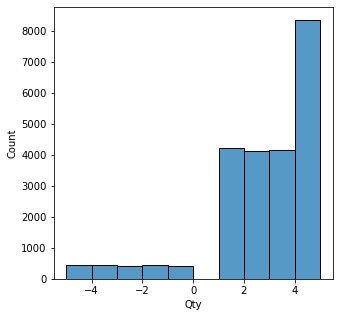

In [19]:
plt.figure(figsize=(5,5))
sns.histplot(x=conti_var.Qty,bins=10)
plt.show()


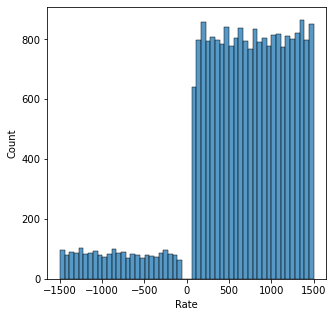

In [20]:
plt.figure(figsize=(5,5))
sns.histplot(x=conti_var.Rate)
plt.show()

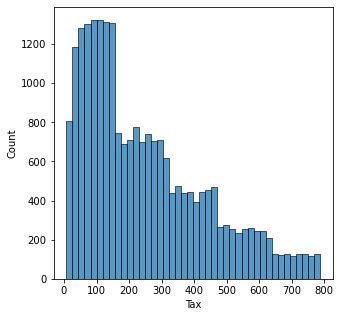

In [21]:
plt.figure(figsize=(5,5))
sns.histplot(x=conti_var.Tax)
plt.show()

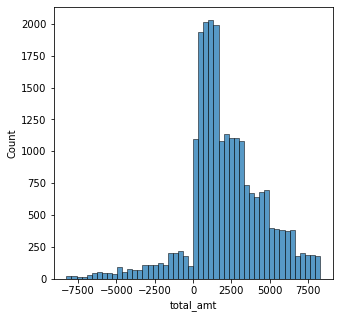

In [22]:
plt.figure(figsize=(5,5))
sns.histplot(x=conti_var.total_amt,bins=50)
plt.show()

#### 3.c. frequency bars for categorical variables

In [23]:
categorical = Customer_Final.loc[:,Customer_Final.dtypes=='object']

C:\Users\avnis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


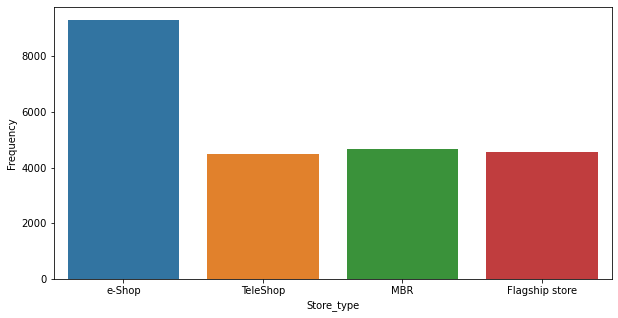

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(categorical.Store_type)
plt.ylabel("Frequency")
plt.show()
warnings.filterwarnings('ignore')

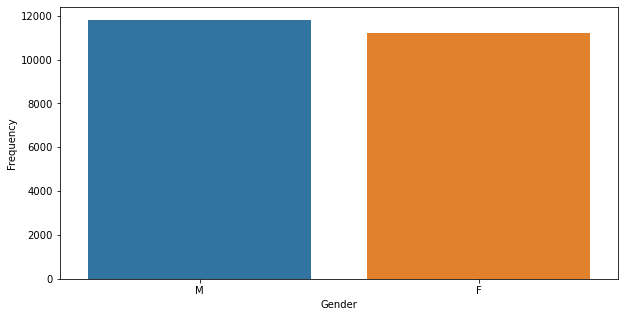

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(categorical.Gender)
plt.ylabel("Frequency")
plt.show()
warnings.filterwarnings('ignore')

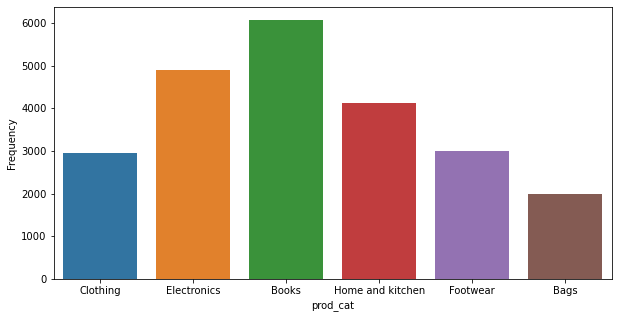

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(categorical.prod_cat)
plt.ylabel("Frequency")
plt.show()
warnings.filterwarnings('ignore')

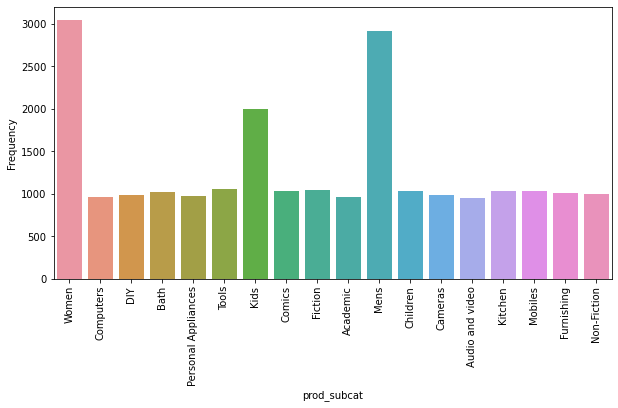

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(categorical.prod_subcat)
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()
warnings.filterwarnings('ignore')

### 4. Calculate the following information using the merged dataset :
##### a. Time period of the available transaction data
##### b. Count of transactions where the total amount of transaction was negative

#### 4a.Time period of the available transaction data

In [28]:
max_date=Customer_Final.tran_date.max()
max_date=pd.datetime.strftime(max_date,format ='%d-%b-%Y')
min_date=Customer_Final.tran_date.min()
min_date=pd.datetime.strftime(min_date,format ='%d-%b-%Y')
print("Time Period for Transaction data is from : " , max_date  , " to ", min_date)

Time Period for Transaction data is from :  02-Dec-2014  to  02-Jan-2011


#### 4b.Count of transactions where the total amount of transaction was negative

In [29]:
negative_tran=Customer_Final.total_amt[Customer_Final.total_amt<0].count()
print("Number of negative transactions =" , negative_tran)

Number of negative transactions = 2164


### 5. Analyze which product categories are more popular among females vs male customers.

In [36]:
Pop_Female=Customer_Final[Customer_Final.Gender== 'F'].groupby(['Gender','prod_cat']).Qty.sum().reset_index()
Pop_Female=Pop_Female.sort_values('Qty',ascending=False).head(1)

In [37]:
print("Product categories popular in Females :", Pop_Female)

Product categories popular in Females :   Gender prod_cat   Qty
1      F    Books  7080


In [38]:
Pop_Male=Customer_Final[Customer_Final.Gender== 'M'].groupby(['Gender','prod_cat']).Qty.sum().reset_index()
Pop_Male=Pop_Male.sort_values('Qty',ascending=False).head(1)

In [39]:
print("Product categories popular in Males :", Pop_Male)

Product categories popular in Males :   Gender prod_cat   Qty
1      M    Books  7587


### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [58]:
Max_city_cust=Customer_Final.groupby(['city_code'])['transaction_id'].count().reset_index()

In [61]:
Max_city_cust['percentage']=(Max_city_cust.transaction_id/Max_city_cust.transaction_id.sum())*100

In [63]:
Max_city_cust=Max_city_cust.sort_values('transaction_id', ascending=False,ignore_index=True).head(1)
print('City code that has maximum customers :',Max_city_cust)

City code that has maximum customers :    city_code  transaction_id  percentage
0        4.0            2422   10.515804


### 7. Which store type sells the maximum products by value and by quantity?

In [70]:
print(Customer_Final.groupby('Store_type')['Qty','Rate'].sum().sort_values('Qty',ascending=False).head(1))

              Qty     Rate
Store_type                
e-Shop      22790  5945770


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [89]:
Flagship_Stores=Customer_Final.loc[(Customer_Final.Store_type=='Flagship store')
                   &((Customer_Final.prod_cat=='Clothing')|
                     (Customer_Final.prod_cat=='Electronics'))]

In [96]:
print(Flagship_Stores.pivot_table(index='Store_type',columns='prod_cat',
                            values='total_amt',aggfunc='sum').T)

Store_type   Flagship store
prod_cat                   
Clothing         1194423.23
Electronics      2215136.04


#### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [101]:
Amount_9=Customer_Final.loc[(Customer_Final.Gender=='M')&(Customer_Final.prod_cat=='Electronics')]

In [103]:
print(Amount_9.pivot_table(index='Gender',columns='prod_cat',
                     values='total_amt',aggfunc='sum'))

prod_cat  Electronics
Gender               
M          5711351.62


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [125]:
Trans_10=Customer_Final.loc[(Customer_Final.total_amt>=0)]

In [128]:
Trans_10=Trans_10.groupby(['customer_Id','prod_cat'])['transaction_id'].count().reset_index()

In [143]:
unique=Trans_10.groupby(['customer_Id'])['transaction_id'].count().reset_index()

In [146]:
unique[unique.transaction_id>10].shape[0] ### no customers with more than 10 unique transactions 

0

#### 11. For all customers aged between 25 - 35, find out:
##### a. What was the total amount spent for “Electronics” and “Books” product categories?
##### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [186]:
now = pd.Timestamp('now')
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'], format='%m%d%y')
Customer_Final['DOB'] = Customer_Final['DOB'].where(
    Customer_Final['DOB'] < now,Customer_Final['DOB'] -  np.timedelta64(100, 'Y')) 
Customer_Final['AGE'] = (now - Customer_Final['DOB']).astype('<m8[Y]')
Customer_25_35=Customer_Final.loc[(Customer_Final.AGE>25)&(Customer_Final.AGE<35)]

#### a.What was the total amount spent for “Electronics” and “Books” product categories?

In [192]:
Amount_11a=Customer_25_35.loc[(Customer_25_35.prod_cat=='Books')|(Customer_25_35.prod_cat=='Electronics')]

In [201]:
Amount_11a.groupby(['prod_cat'])['total_amt'].sum()

prod_cat
Books          3347887.01
Electronics    3016389.22
Name: total_amt, dtype: float64

#### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [204]:
Amount_11b=Customer_25_35[(Customer_25_35.tran_date>='2014-01-01') & (Customer_25_35.tran_date <='2014-03-01')]

In [211]:
print("The Total Amount spent by customers aged 25-35 between 1st Jan,2014 to 1st Mar,2014  : ",Amount_11b.total_amt.sum())

The Total Amount spent by customers aged 25-35 between 1st Jan,2014 to 1st Mar,2014  :  438914.84
